In [3]:
from castle.datasets import DAG, IIDSimulation
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create

In [4]:
SEED = 18
np.random.seed(SEED)

In [5]:
adj_matrix = DAG.scale_free(
    n_nodes=10,
    n_edges=17,
    seed=SEED
)

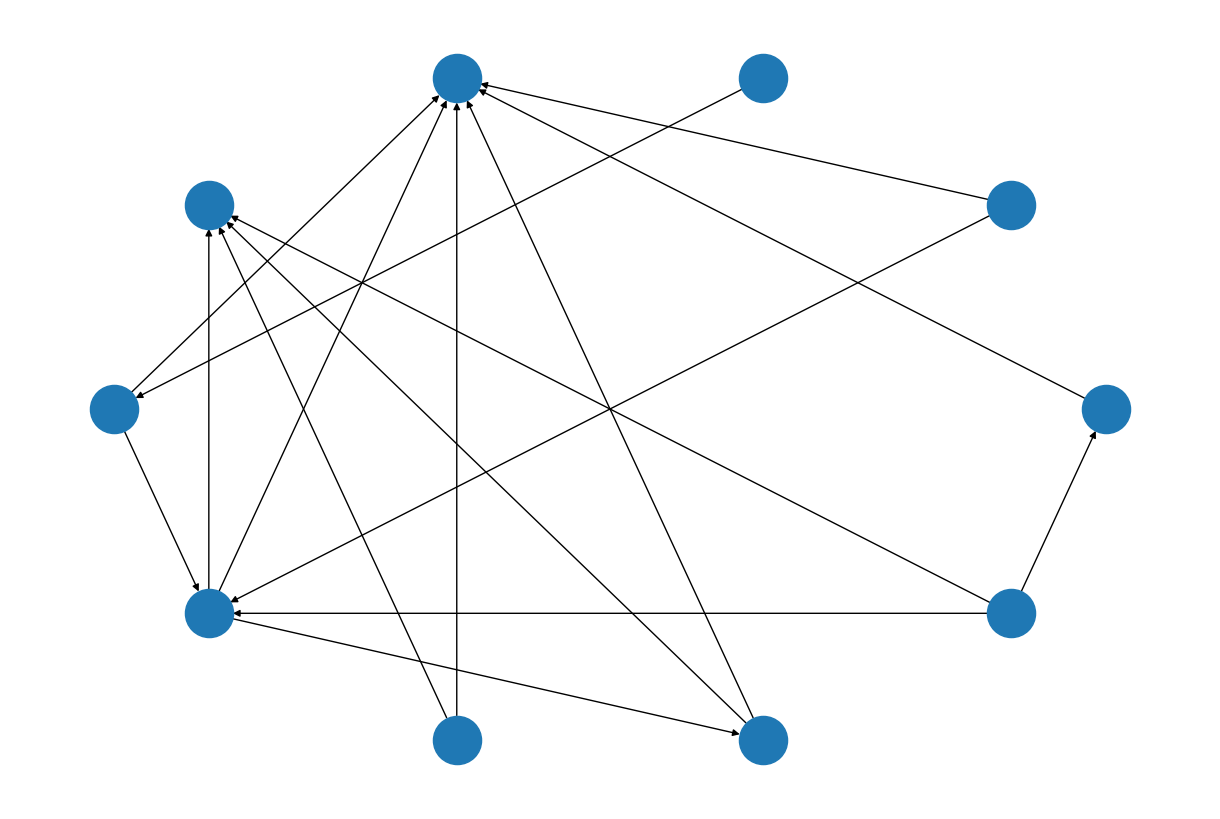

In [6]:
g = nx.DiGraph(adj_matrix)
plt.figure(figsize=(12, 8))
nx.draw(
    G=g,
    node_size=1200,
    pos=nx.circular_layout(g)
)

In [7]:
dataset = IIDSimulation(
	W=adj_matrix,
	n=10_000,
	method='linear',
	sem_type='gauss'
)

2023-07-31 11:35:51,730 - /Users/danieloliveiradebrito/Projetos/causal-inference/venv/lib/python3.9/site-packages/castle/datasets/simulator.py[line:270] - INFO: Finished synthetic dataset


In [9]:
dataset.X

array([[ 0.20316071,  0.46957875, -0.5451643 , ...,  0.43655576,
        -3.9526261 , -0.58334128],
       [ 0.95028014,  0.69055054,  0.25689778, ...,  1.33061022,
         3.60491164,  0.53405008],
       [-0.8786259 ,  1.0482187 ,  0.63440113, ..., -0.39639459,
         0.32608207, -1.0564536 ],
       ...,
       [-0.91570809, -0.0239333 , -0.2915973 , ...,  1.2503226 ,
        -3.98304516, -1.29869284],
       [-0.15152213, -0.35457535, -0.59788574, ...,  0.18337993,
        -2.57206537, -1.28173348],
       [-2.53845353,  0.83873167, -0.46620237, ...,  0.72125983,
        -0.51524042, -2.73397931]])

# Fit

In [10]:
from castle.algorithms import PC

pc = PC()
pc.learn(dataset.X)
pc.causal_matrix

Tensor([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 1, 0, 0, 0]])

In [11]:
from castle.metrics import MetricsDAG

metrics = MetricsDAG(
    B_est=pc.causal_matrix,
    B_true=adj_matrix
)

In [13]:
metrics.metrics

{'fdr': 0.1765,
 'tpr': 0.875,
 'fpr': 0.1034,
 'shd': 5,
 'nnz': 17,
 'precision': 0.7778,
 'recall': 0.875,
 'F1': 0.8235,
 'gscore': 0.625}

# PC

In [14]:
N = 1_000
p = np.random.randn(N)
q = np.random.randn(N)
r = p + q + .1 * np.random.randn(N)
s = .7 * r + .1 * np.random.randn(N)

pc_dataset = np.vstack([p, q, r, s]).T

In [15]:
pc_dataset

array([[ 1.835,  1.388,  3.192,  2.321],
       [-0.285, -0.159, -0.464, -0.279],
       [-0.306, -2.119, -2.326, -1.585],
       ...,
       [ 0.799, -1.206, -0.465, -0.343],
       [-2.191,  0.023, -2.398, -1.788],
       [ 0.999,  1.259,  2.241,  1.556]])

In [16]:
pc = PC()
pc.learn(pc_dataset)

In [24]:
pc.causal_matrix

Tensor([[0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 0]])

# GES

In [19]:
from castle.algorithms import GES

ges = GES(criterion='bic')
ges.learn(pc_dataset)

# ANM

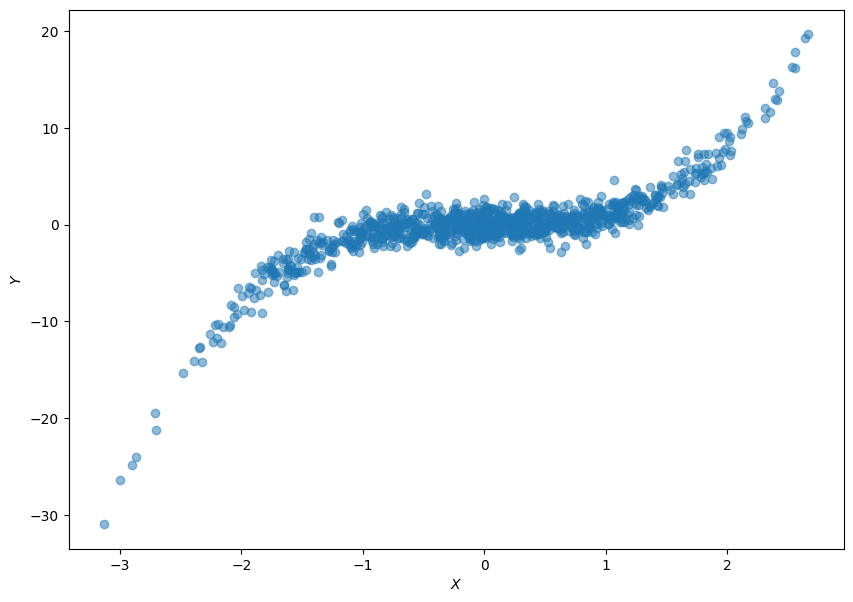

In [22]:
x = np.random.randn(1000)
y = x**3 + np.random.randn(1000)

plt.figure(figsize=(10, 7))
plt.scatter(x, y, alpha=.5)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.show()

In [ ]:

est_dw = est.dowhy.fit(Y, T, X=X, W=W, outcome_names=["log_demand"], treatment_names=["log_price"], feature_names=["income"],
               confounder_names=confounder_names, inference="statsmodels")